# Read "AROME_ARPEGE_SIRTA_Oct2015_Sep2019.txt"

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import glob
from matplotlib import pyplot as plt
import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Style of figures
plt.style.use('seaborn-poster')
# Size of figures
plt.rcParams['figure.figsize'] = 10, 7

# Define a function to read the file

In [2]:
COL_NAMES = [
    'date','SZA','SAA','DIRECT', 'DIFFUSE', 'GLOBAL', 'cGLOBAL', 
    'GLO_ARO1_J', 'GLO_ARO2_J', 'GLO_ARP_J', 'GLO_ARO1_J1', 'GLO_ARO2_J1', 'GLO_ARP_J1', 
    'mT2', 'T2_ARO1_J','T2_ARO2_J','T2_ARP_J','T2_ARO1_J1','T2_ARO2_J1','T2_ARP_J1', 
    'mRH','RH_ARO1_J','RH_ARO2_J','RH_ARP_J','RH_ARO1_J1','RH_ARO2_J1','RH_ARP_J1', 
]


def read_aa(files):

    for n, f in enumerate(files):
        tmp = pd.io.parsers.read_table(
            f,
            comment='#',
            sep=',',
            parse_dates=[0],
            date_parser=lambda s: dt.datetime.strptime(s, "%Y-%m-%d %H:%M:%S"),
            names=COL_NAMES,
            index_col='date',
            #na_values = ["-999", "-999.99", "-99.9"],
        )
        if n == 0:
            data = tmp
        else:
            data = pd.concat([data, tmp])

    return data

# Read the file in a data frame

In [3]:
files = glob.glob('AROME_ARPEGE_SIRTA_Oct2015_Sep2019.txt')
data=read_aa(files)

In [4]:
data.columns
print(len(data))


34896


In [5]:
data = data.loc[(data.GLO_ARP_J1 > 0) & (data.GLO_ARP_J > 0) & (data.GLO_ARO1_J1 > 0) & (data.GLO_ARO1_J > 0) & (data.GLO_ARO2_J1 > 0) & (data.SZA < 85)]
print(len(data))
datans = data.loc[(data.index.year == 2016) & (data.GLO_ARP_J1 > 0) & (data.GLO_ARP_J > 0) & (data.GLO_ARO1_J1 > 0) & (data.GLO_ARO1_J > 0) & (data.GLO_ARO2_J1 > 0) & (data.SZA < 85)]
print(len(datans))
data = data.loc[data.index.year != 2016]
print(len(data))
datans

12690
2776
9914


,SZA,SAA,DIRECT,DIFFUSE,GLOBAL,cGLOBAL,GLO_ARO1_J,GLO_ARO2_J,GLO_ARP_J,GLO_ARO1_J1,...,T2_ARO1_J1,T2_ARO2_J1,T2_ARP_J1,mRH,RH_ARO1_J,RH_ARO2_J,RH_ARP_J,RH_ARO1_J1,RH_ARO2_J1,RH_ARP_J1
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 09:00:00,78.7,-33.5,0.1,43.0,43.1,171.2,113.4,114.9,39.8,41.2,...,6.3,6.2,4.8,98.1,98.2,99.9,93.4,92.9,94.2,97.9
2016-01-01 10:00:00,74.3,-20.1,0.1,59.6,59.6,253.6,132.2,135.7,77.5,43.1,...,6.3,6.2,5.4,98.4,98.0,99.7,91.6,94.8,96.3,96.3
2016-01-01 11:00:00,72.0,-5.9,0.2,62.5,62.4,296.0,120.0,119.5,160.4,96.7,...,7.0,6.8,6.4,98.6,98.5,99.9,88.7,93.2,94.9,94.7
2016-01-01 12:00:00,72.3,8.6,0.2,56.1,56.0,291.6,85.5,86.6,171.7,158.7,...,7.9,7.8,7.2,98.6,98.4,99.8,87.5,89.6,91.4,92.7
2016-01-01 13:00:00,74.9,22.7,0.4,62.9,62.9,241.3,73.0,72.7,96.4,129.2,...,8.6,8.5,7.1,98.2,97.3,98.8,88.7,87.0,88.3,91.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19 10:00:00,74.3,-18.6,0.3,88.0,87.8,251.7,182.8,200.6,52.2,71.0,...,3.5,3.4,3.2,98.9,85.8,87.3,94.8,94.7,95.6,94.7
2016-12-19 11:00:00,72.4,-4.4,212.4,130.7,196.5,289.1,137.4,154.3,172.5,56.7,...,3.7,3.6,3.1,92.4,87.2,88.3,92.8,90.5,92.3,92.1
2016-12-19 12:00:00,72.8,10.0,0.3,90.9,90.7,280.0,95.5,118.5,143.4,87.3,...,4.0,3.9,3.0,78.6,83.2,84.9,90.5,91.3,92.2,90.1


In [6]:
data['kt'] = data.GLOBAL / data.cGLOBAL

In [7]:
data['mT2 * kt'] = data.mT2 * data.kt
data['mRH * kt'] = data.mRH * data.kt 
# data['var13'] = data.mRH * data.mT2
# data['var14'] = data.mT2 * data.kt * data.mRH
data['GLO_ARP_J1 * kt'] = data.GLO_ARP_J1 * data.kt
data['GLO_ARP_J * kt'] = data.GLO_ARP_J * data.kt 
data['GLO_ARO1_J1 * kt'] = data.GLO_ARO1_J1 * data.kt
data['GLO_ARO1_J * kt'] = data.GLO_ARO1_J * data.kt 
data['GLO_ARO2_J1 * kt'] = data.GLO_ARO2_J1 * data.kt
data['GLO_ARO2_J * kt'] = data.GLO_ARO2_J * data.kt 

# data['var21'] = data.mT2 ** 2
# data['var22'] = data.mRH ** 2
# data['var23'] = data.kt ** 2

# data['var24'] = (data.mT2 **2) * (data.kt**2) * (data.mRH**2)
# data['var25'] = (data.mT2 **2) * (data.kt**2)
# data['var26'] = (data.mT2 **2) * (data.mRH**2)
# data['var27'] = (data.kt **2) * (data.mRH**2)

# data['var28'] = (data.mT2 **2) * (data.kt)
# data['var29'] = (data.mT2 **2) * (data.kt) * (data.mRH)
# data['var210'] =(data.mT2 **2) * (data.mRH)

# data['var211'] =(data.mRH **2) * (data.kt)
# data['var212'] =(data.mRH **2) * (data.mT2)
# data['var213'] =(data.mRH **2) * (data.kt) * (data.mT2)

# data['var214'] =(data.kt **2) * (data.mRH) * (data.mT2)
# data['var215'] =(data.kt **2) * (data.mRH) 
# data['var216'] =(data.kt **2) * (data.mT2)

# data['var31'] = data.mT2 ** 3
# data['var32'] = data.mRH ** 3
# data['var33'] = data.kt ** 3

# data['var2'] = 1/data.mRH
# data['var3'] = 1/data.kt

# data['var4'] = data.GLO_ARP_J1 - data.GLOBAL
# data['var5'] = data.GLO_ARP_J - data.GLOBAL
# data['var6'] = data.GLO_ARO1_J1 - data.GLOBAL
# data['var7'] = data.GLO_ARO1_J - data.GLOBAL
# data['var8'] = data.GLO_ARO2_J1 - data.GLOBAL
# data['var9'] = data.GLO_ARO2_J - data.GLOBAL

In [8]:
x = data[['SAA','SZA','GLO_ARP_J1','GLO_ARP_J','GLO_ARO1_J1','GLO_ARO1_J','GLO_ARO2_J1']]
# 'SAA','GLO_ARO2_J'
#'var11', 'var12', 'var13','var14', 'var21', 'var22', 'var23', 'var24','var25', 'var26', 'var27', 'var28', 'var29', 'var210', 'var211','var212','var213', 'var214','var215','var216','var31','var32', 'var33','var2','var3']]
y = data['GLOBAL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [9]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=regressor.predict(x_test)

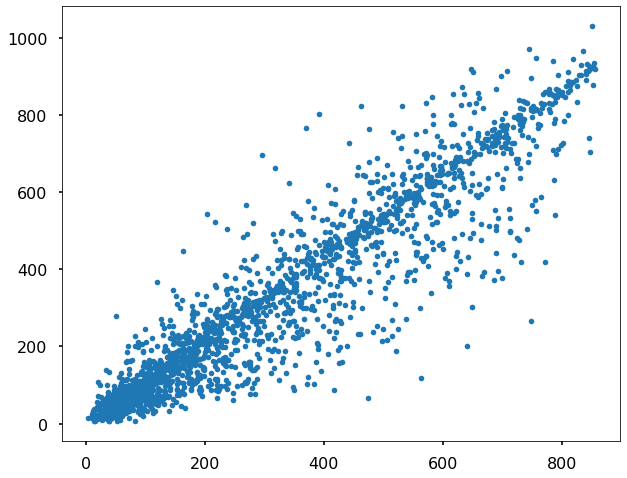

In [11]:
ax=plt.figure(figsize=(10,8))
plt.plot(y_pred,y_test,linestyle='none',marker='.')

In [12]:
abserr = np.abs((y_pred - y_test))#/y_test
# print((lathos))
print(min(abserr))
print(max(abserr))
relerr = (100 * np.average(abserr)/np.average(y_test))
print(relerr)
r2_score(y_pred, y_test)

0.029093696461700347
483.4334221709971
19.05151860537263


0.8408776207902373

In [13]:
regressor.coef_

array([-0.07098063, -0.49215114,  0.18207826,  0.2579785 ,  0.49921484,
        0.28098348, -0.31236334])

In [14]:
import statsmodels.api as sm
from IPython.display import display

# x = sm.add_constant(x)
# mreg = sm.OLS(y, x).fit()
# display(mreg.summary())

x_train = sm.add_constant(x_train)
mreg = sm.OLS(y_train, x_train).fit()
display(mreg.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GLOBAL   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     6582.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -47237.
No. Observations:                7931   AIC:                         9.449e+04
Df Residuals:                    7923   BIC:                         9.455e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          49.2182     10.669      4.613      0.000      28.304      70.132
SAA            -0.0710      0.017     -4.108      0.000      -0.105      -0.037
SZA            -0.4922      0.132     -3.725      0.000      -0.751      -0.233
GLO_ARP_J1      0.1821      0.013     14.228      0.000       0.157       0.207
GLO_ARP_J       0.2580      0.013     19.488      0.000       0.232       0.284
GLO_ARO1_J1     0.4992      0.054      9.269      0.000       0.394       0.605
GLO_ARO1_J      0.2810      0.013     22.125      0.000       0.256       0.306
GLO_ARO2_J1    -0.3124      0.054     -5.757      0.000      -0.419      -0.206
==============================================================================
Omnibus:                     1065.323   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4293.010
Skew:                          -0.621   Prob(JB):                         0.00
Kurtosis:                       6.383   Cond. No.                     9.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# datans['kt'] = datans.GLOBAL / datans.cGLOBAL
# datans['mT2 * kt'] = datans.mT2 * datans.kt
# datans['mRH * kt'] = datans.mRH * datans.kt 
# datans['GLO_ARP_J1 * kt'] = datans.GLO_ARP_J1 * datans.kt
# datans['GLO_ARP_J * kt'] = datans.GLO_ARP_J * datans.kt 
# datans['GLO_ARO1_J1 * kt'] = datans.GLO_ARO1_J1 * datans.kt
# datans['GLO_ARO1_J * kt'] = datans.GLO_ARO1_J * datans.kt 
# datans['GLO_ARO2_J1 * kt'] = datans.GLO_ARO2_J1 * datans.kt
# datans['GLO_ARO2_J * kt'] = datans.GLO_ARO2_J * datans.kt 
xns = datans[['SAA','SZA','GLO_ARP_J1','GLO_ARP_J','GLO_ARO1_J1','GLO_ARO1_J','GLO_ARO2_J1']]
yns = datans['GLOBAL']

In [16]:
yns_pred=regressor.predict(xns)

In [17]:
abserrns = np.abs((yns_pred - yns))
relerrns = (100 * np.average(abserrns)/np.average(yns))
print(min(abserrns))
print(max(abserrns))
print(relerrns)
r2_score(yns_pred, yns)
datans['GLOBALP'] = yns_pred

0.0029222970018025762
484.60834216818466
24.367875965397882


Text(0.5, 1.0, 'Performance of model')

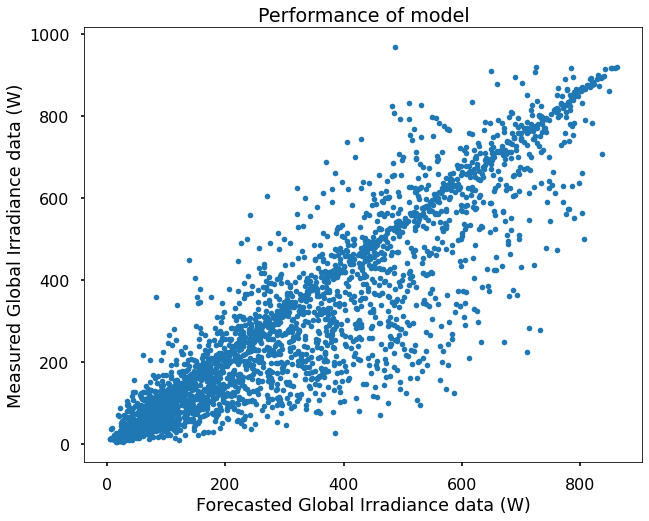

In [18]:
ax=plt.figure(figsize=(10,8))
plt.plot(yns_pred,yns,linestyle='none',marker='.')
# plt.figure(figsize=(10, 8))
# plt.scatter(yns, xns)
# plt.scatter(regressor.predict(xns), xns)
#plt.legend(['Simple Exponential Method', 'Holt Winter Method'])
plt.xlabel('Forecasted Global Irradiance data (W)')
plt.ylabel('Measured Global Irradiance data (W)')
plt.title('Performance of model')

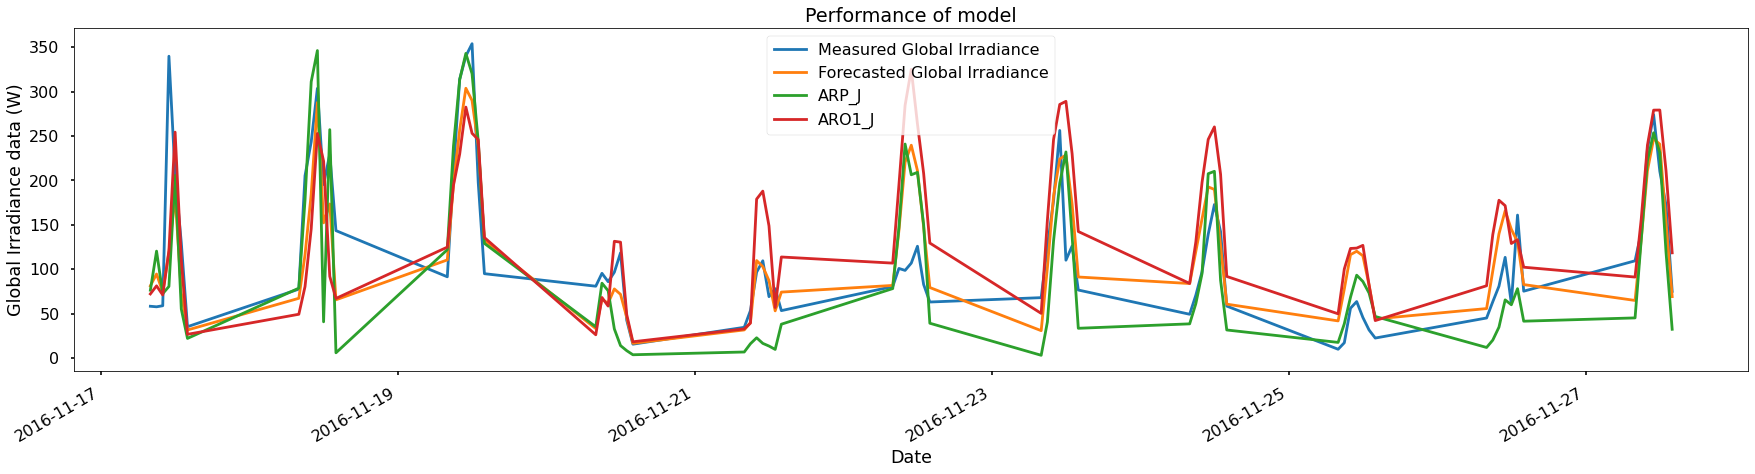

In [24]:
fig,ax = plt.subplots(figsize=(30,7))
datans['20161117':'20161127'][['GLOBAL','GLOBALP','GLO_ARP_J','GLO_ARO1_J']].plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Global Irradiance data (W)')
plt.title('Performance of model')
plt.legend(['Measured Global Irradiance', 'Forecasted Global Irradiance','ARP_J','ARO1_J'])